## MUSIC RECOMENDATION SYSTEM

In [1]:
#importing all relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import statsmodels.api as sm
from warnings import filterwarnings
import os
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

filterwarnings('ignore')

In [2]:
#loading my dataset
data_main = pd.read_csv('top 100 streamed songs.csv').drop(columns=['id'])
data = data_main.drop(columns=['name'])
data_main.head()

,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


In [3]:
#viewing the first rows in our dataset
data.head()

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


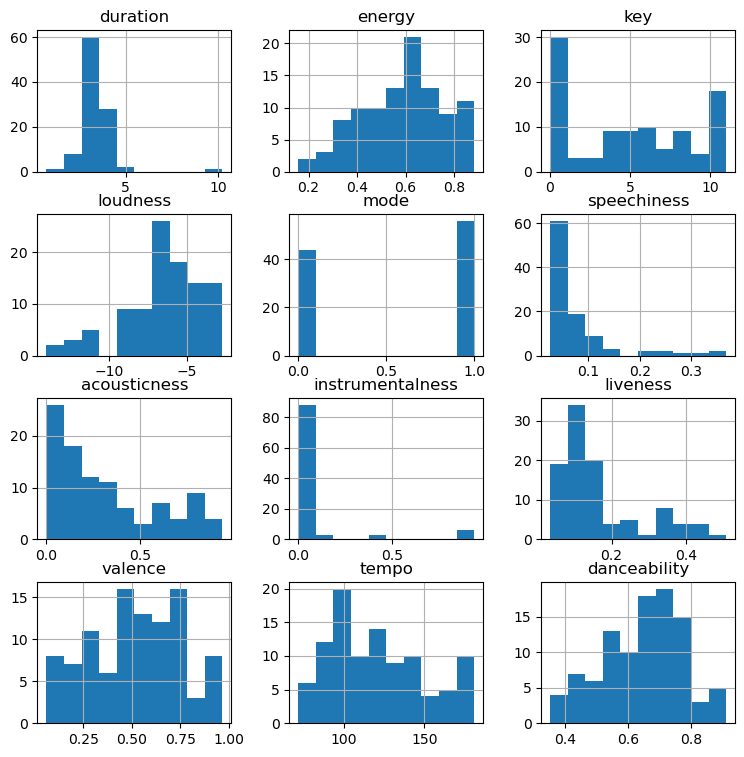

In [4]:
#plotting distribution plots of our data
data.hist(figsize = (9,9));

In [5]:
#having a general description of our data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,100.0,3.404900,0.927022,0.73000,2.910000,3.3700,3.630000,10.220
energy,100.0,0.587650,0.168273,0.15700,0.477750,0.6090,0.707750,0.883
key,100.0,5.050000,3.825420,0.00000,1.000000,5.0000,8.000000,11.000
loudness,100.0,-6.577120,2.447338,-14.06700,-7.676250,-6.2625,-4.786750,-2.724
mode,100.0,0.560000,0.498888,0.00000,0.000000,1.0000,1.000000,1.000
speechiness,100.0,0.075461,0.068065,0.02530,0.036100,0.0518,0.080650,0.368
acousticness,100.0,0.314539,0.281076,0.00028,0.090750,0.2385,0.519750,0.941
instrumentalness,100.0,0.070682,0.221947,0.00000,0.000000,0.0000,0.000083,0.941
liveness,100.0,0.161737,0.112657,0.03410,0.088375,0.1200,0.205250,0.509
valence,100.0,0.517354,0.237512,0.05920,0.329000,0.5420,0.711500,0.967


## Approach 1: Recomendation with Eucledian Distance

In [6]:
#select features
data_features = data.iloc[:,1:]
#scale
data_features_scaled =  StandardScaler().fit_transform(data_features)

def n_nearest_row(dataframe,input_row,n=5):
    print("Input song:\n",pd.DataFrame(data.iloc[input_row,:]).T)

    distances = pdist(dataframe.values, metric='euclidean')
    dist_matrix = squareform(distances)
    distances_from_input_row = pd.DataFrame(dist_matrix)[input_row].sort_values()

    distances_from_input_row = distances_from_input_row[1:n+1].sort_index()
    nearest_rows = data_main[data.index.isin(distances_from_input_row.index)]

    output_df = pd.concat((nearest_rows,distances_from_input_row),axis=1)
    
    columns = list(data_main.columns)
    columns.append("distance")
    output_df.columns=columns

    return output_df



nearest_5_row = n_nearest_row(data_features,96) # we will examine the first index
print("\n\nNearest songs: ")
nearest_5_row



Input song:
     duration  energy   key  loudness  mode  speechiness  acousticness  \
96      3.37   0.748  11.0    -5.922   0.0       0.0589         0.305   

    instrumentalness  liveness  valence    tempo  danceability  
96               0.0    0.0811    0.964  163.984         0.672  


Nearest songs: 


,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,distance
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.3350,0.000000,0.0849,0.688,166.928,0.563,3.813541
1,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.3790,0.868000,0.1100,0.454,170.054,0.564,8.751547
47,Cover Me In Sunshine P!nk & Willow Sage Hart,2.37,0.488,5,-11.276,1,0.0568,0.0142,0.900000,0.1560,0.107,160.013,0.543,9.118828
58,Stressed Out twenty one pilots,3.37,0.637,4,-5.677,0,0.1410,0.0462,0.000023,0.0602,0.648,169.977,0.734,9.228556
80,rockstar (feat. 21 Savage) Post Malone,3.64,0.520,5,-6.136,0,0.0712,0.1240,0.000070,0.1310,0.129,159.801,0.585,7.371259


In [7]:
data_main.shape

(100, 13)

In [8]:
data.shape

(100, 12)

## Aproach2: Recomendation withK-Nearest

in order to find the optimal values of K for our classification, we used KMeans from the scikit-learn library and the elbow visualizer for the yellow brick bibrary.

In [9]:
!pip install yellowbrick

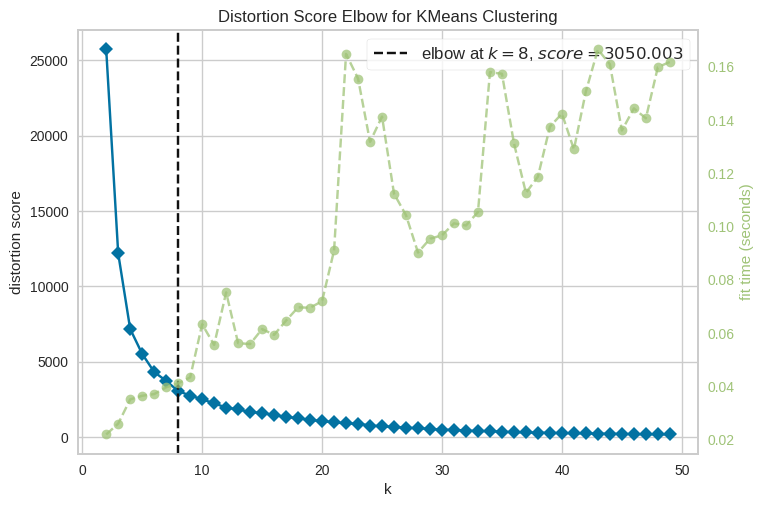

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))

visualizer.fit(data_features)
visualizer.poof();

after fitting the visualizer to our features, we are able to determine the optimal value of k to 8.

In [11]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_features)
data_groups = pd.concat((data_main, pd.DataFrame(kmeans.labels_,columns=['Group'])), axis=1)
data_groups.head(5)

,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Group
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563,3
1,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564,3
2,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702,1
3,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677,6
4,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593,3


In [12]:
group5 = data_groups[data_groups['Group']==5]
group5

,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Group
7,drivers license Olivia Rodrigo,4.03,0.431,10,-8.810,1,0.0578,0.7680,0.000014,0.1060,0.137,143.875,0.561,5
24,Beggin' Måneskin,3.53,0.800,11,-4.808,0,0.0504,0.1270,0.000000,0.3590,0.589,134.002,0.714,5
33,Shivers Ed Sheeran,3.46,0.859,2,-2.724,1,0.0856,0.2810,0.000000,0.0424,0.822,141.020,0.788,5
62,We're Good Dua Lipa,2.77,0.590,6,-4.326,1,0.0483,0.1180,0.000000,0.1430,0.691,133.970,0.704,5
70,Heat Waves - Diplo Remix Glass Animals,2.36,0.565,11,-7.187,1,0.3380,0.1160,0.000000,0.4280,0.403,137.075,0.568,5
73,Hold On Justin Bieber,2.85,0.634,1,-5.797,0,0.0413,0.0106,0.000000,0.1320,0.290,139.980,0.658,5
82,Golden Harry Styles,3.48,0.838,4,-5.257,0,0.0557,0.2100,0.000131,0.1310,0.254,139.863,0.448,5
89,Hold On Justin Bieber,2.85,0.634,1,-5.797,0,0.0413,0.0106,0.000000,0.1320,0.290,139.980,0.658,5
91,drivers license Olivia Rodrigo,4.03,0.431,10,-8.810,1,0.0578,0.7680,0.000014,0.1060,0.137,143.875,0.561,5


## Applying PCA in our dataset

by appling pca in the dataset may be very isefull.

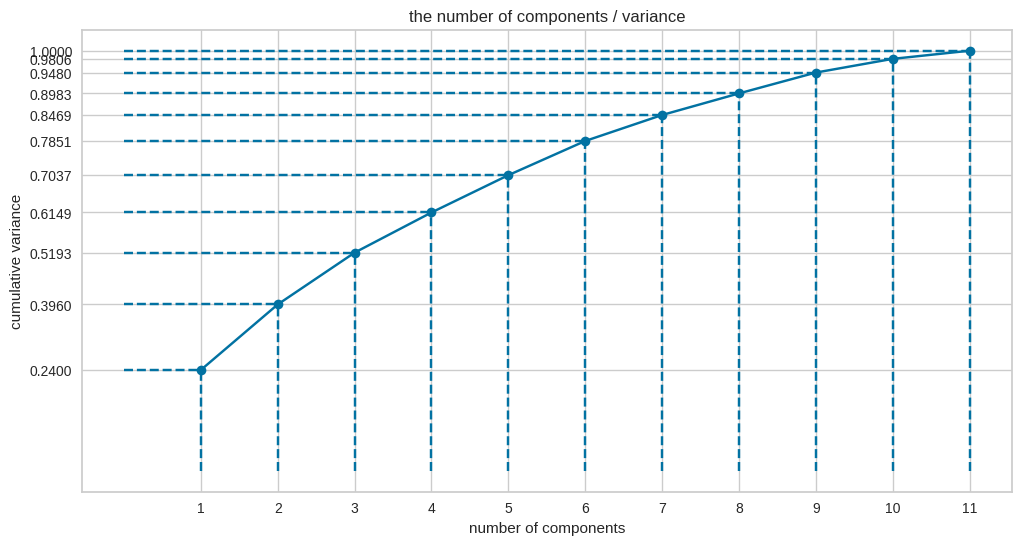

In [13]:
plt.rcParams['figure.figsize']=(12,6)
pca = PCA().fit(data_features_scaled)

plt.ylabel('cumulative variance')
plt.title('the number of components / variance')
plt.xlabel('number of components')

x = np.arange(1, 12)
y = np.cumsum(pca.explained_variance_ratio_)

plt.xticks(x)
plt.yticks(y)

plt.plot(x, y, marker='o', linestyle='-', color='b')

plt.hlines(y, 0, x, linestyle='--')
plt.vlines(x, 0, y, linestyle='--')

plt.show()